In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
titanic = sns.load_dataset("titanic") # Loading titanic dataset

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
feature = ["pclass", "sex", "fare", "embarked", "age"]
target = ["survived"]

In [8]:
# filling missing data using imputor
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy = "median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])

imp_freq = SimpleImputer(strategy = "most_frequent") 
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])


In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
#encode 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])


In [12]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


In [30]:
X = titanic[feature]
y = titanic["survived"]

In [31]:
X_train, X_test , y_train, y_test = train_test_split (
    X,y, test_size = 0.2, random_state = 42
)

In [32]:
#Decision Tree Model -- No Pruning

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train , y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [33]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred) )

Accuracy Score : 0.7821229050279329


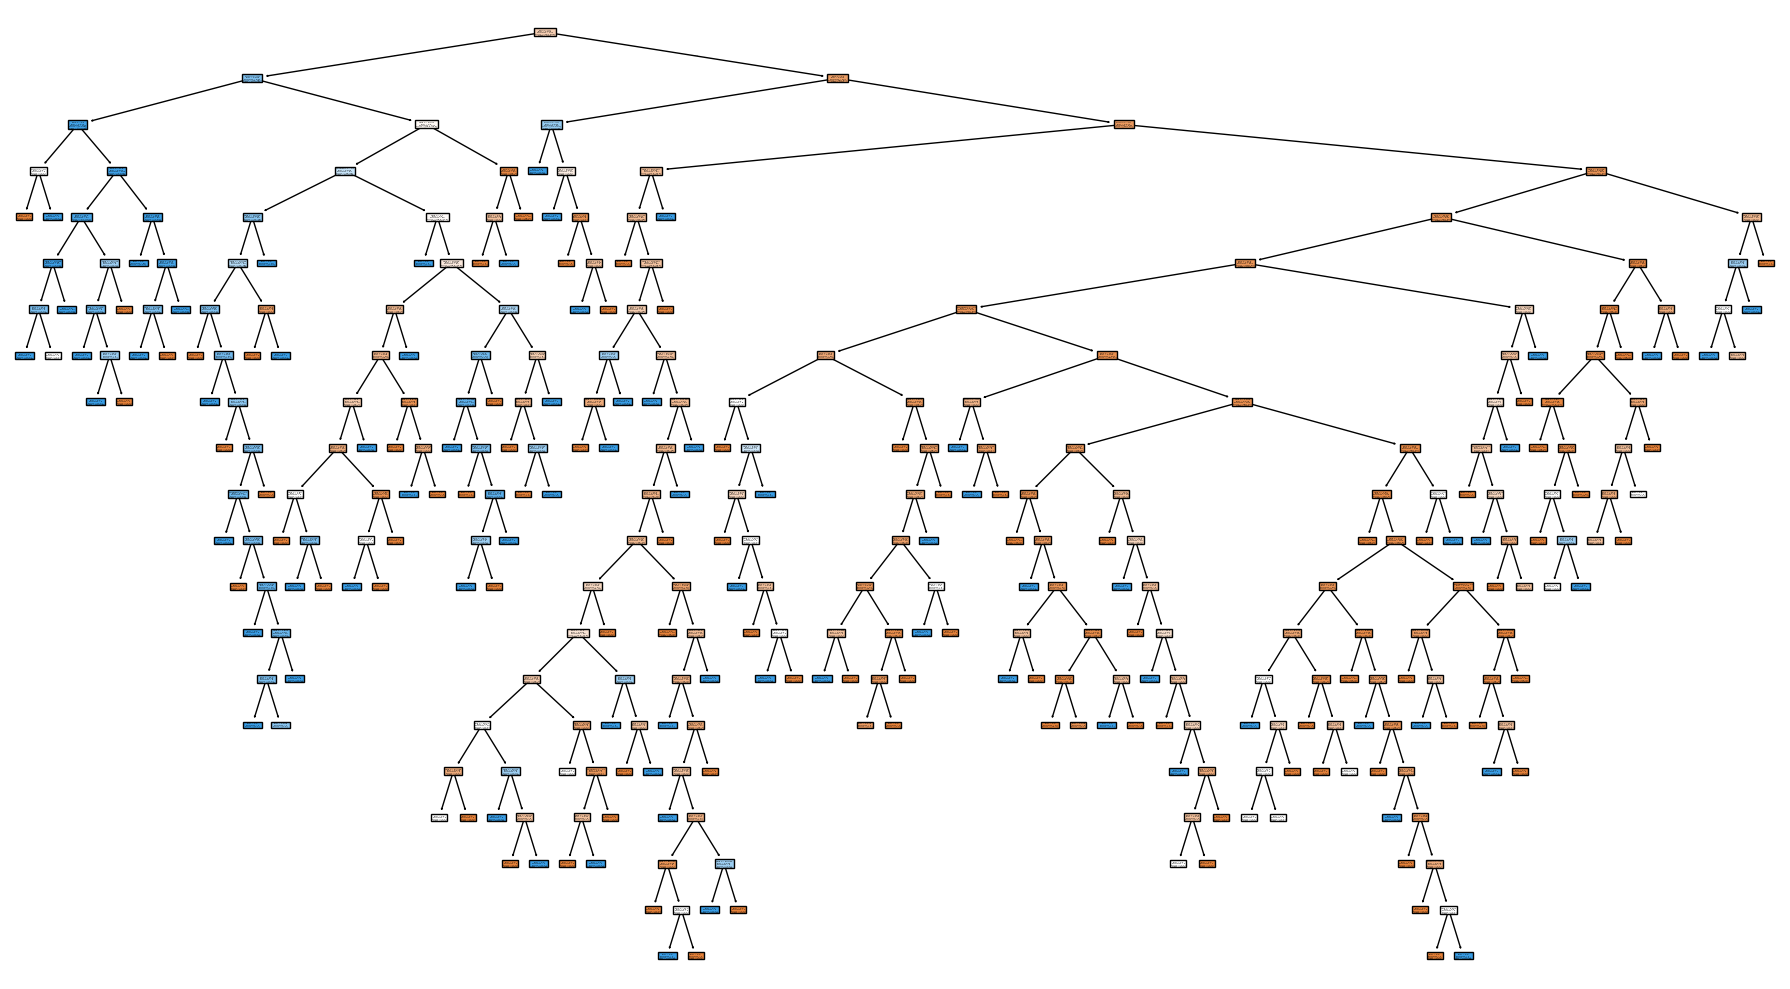

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize =(18,10))
plot_tree(
    model,
    feature_names = X.columns,
    class_names = ["died","survived"],
    filled = True,
)

plt.tight_layout()
plt.show()

In [35]:
# Decision Tree with Pre-pruning
max_depth = [2,3,4,5,6,7,8,9,10]
for depth in max_depth :
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train , y_train)

    accuracy = model.score(X_test, y_test)
    print(f"for depth={depth}, accuracy{accuracy}")

for depth=2, accuracy0.7653631284916201
for depth=3, accuracy0.7988826815642458
for depth=4, accuracy0.7988826815642458
for depth=5, accuracy0.7988826815642458
for depth=6, accuracy0.7988826815642458
for depth=7, accuracy0.7988826815642458
for depth=8, accuracy0.7877094972067039
for depth=9, accuracy0.7932960893854749
for depth=10, accuracy0.7877094972067039


In [36]:
# accuracy value for depth = 4 is highest so we choose that value to train
min_samples_split = [10, 15, 20, 25, 30]
for split in min_samples_split :
    model = DecisionTreeClassifier(max_depth = 4, min_samples_split = split)
    model.fit(X_train , y_train)

    accuracy = model.score(X_test, y_test)
    print(f"for split={split}, accuracy{accuracy}")

for split=10, accuracy0.7988826815642458
for split=15, accuracy0.7988826815642458
for split=20, accuracy0.7988826815642458
for split=25, accuracy0.7932960893854749
for split=30, accuracy0.7932960893854749


In [37]:
# Decision Tree with Post-pruning
full_tree = DecisionTreeClassifier(random_state = 42)
full_tree.fit(X_train , y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [38]:
path = full_tree.cost_complexity_pruning_path(X_train , y_train)

ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 6.68806849e-05 1.45921494e-04
 1.84428555e-04 2.00642055e-04 2.34082397e-04 2.34082397e-04
 3.51123596e-04 4.68164794e-04 4.68164794e-04 5.61797753e-04
 6.24219725e-04 6.67991230e-04 7.02247191e-04 7.02247191e-04
 8.19288390e-04 8.19288390e-04 8.32292967e-04 8.42696629e-04
 8.42696629e-04 8.42696629e-04 8.94231048e-04 8.99610781e-04
 9.24769963e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.88347898e-04 1.00253471e-03 1.05337079e-03 1.07400895e-03
 1.08038029e-03 1.11865144e-03 1.12359551e-03 1.12359551e-03
 1.13139825e-03 1.17041199e-03 1.18841832e-03 1.22566125e-03
 1.22893258e-03 1.22893258e-03 1.24361593e-03 1.24843945e-03
 1.27565833e-03 1.30996111e-03 1.33761370e-03 1.37044603e-03
 1.46301498e-03 1.47927070e-03 1.51142557e-03 1.54072312e-03
 1.56675436e-03 1.60434338e-03 1.66892062e-03 1.76144762e-03
 1.86751451e-03 2.10674157e-03 2.34082397e-03 2.41226470e-03
 2.64273538e-03 2.69412911e-03 3.43770913e-03 3.56327570e-03
 5.47433606e-03 9.055400

In [39]:
tree = []

path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train, y_train)

for alpha in path.ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    model.fit(X_train, y_train)
    tree.append((alpha, model))


In [40]:
best_acc = 0
best_alpha = 0
best_model = None

for alpha, model in tree:
    curr_acc = model.score(X_test, y_test)
    
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha
        best_model = model


In [41]:
final_model = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
final_model.fit(X_train, y_train)

print("Best Alpha:", best_alpha)
print("Best Accuracy:", best_acc)


Best Alpha: 0.0015407231242023183
Best Accuracy: 0.8379888268156425


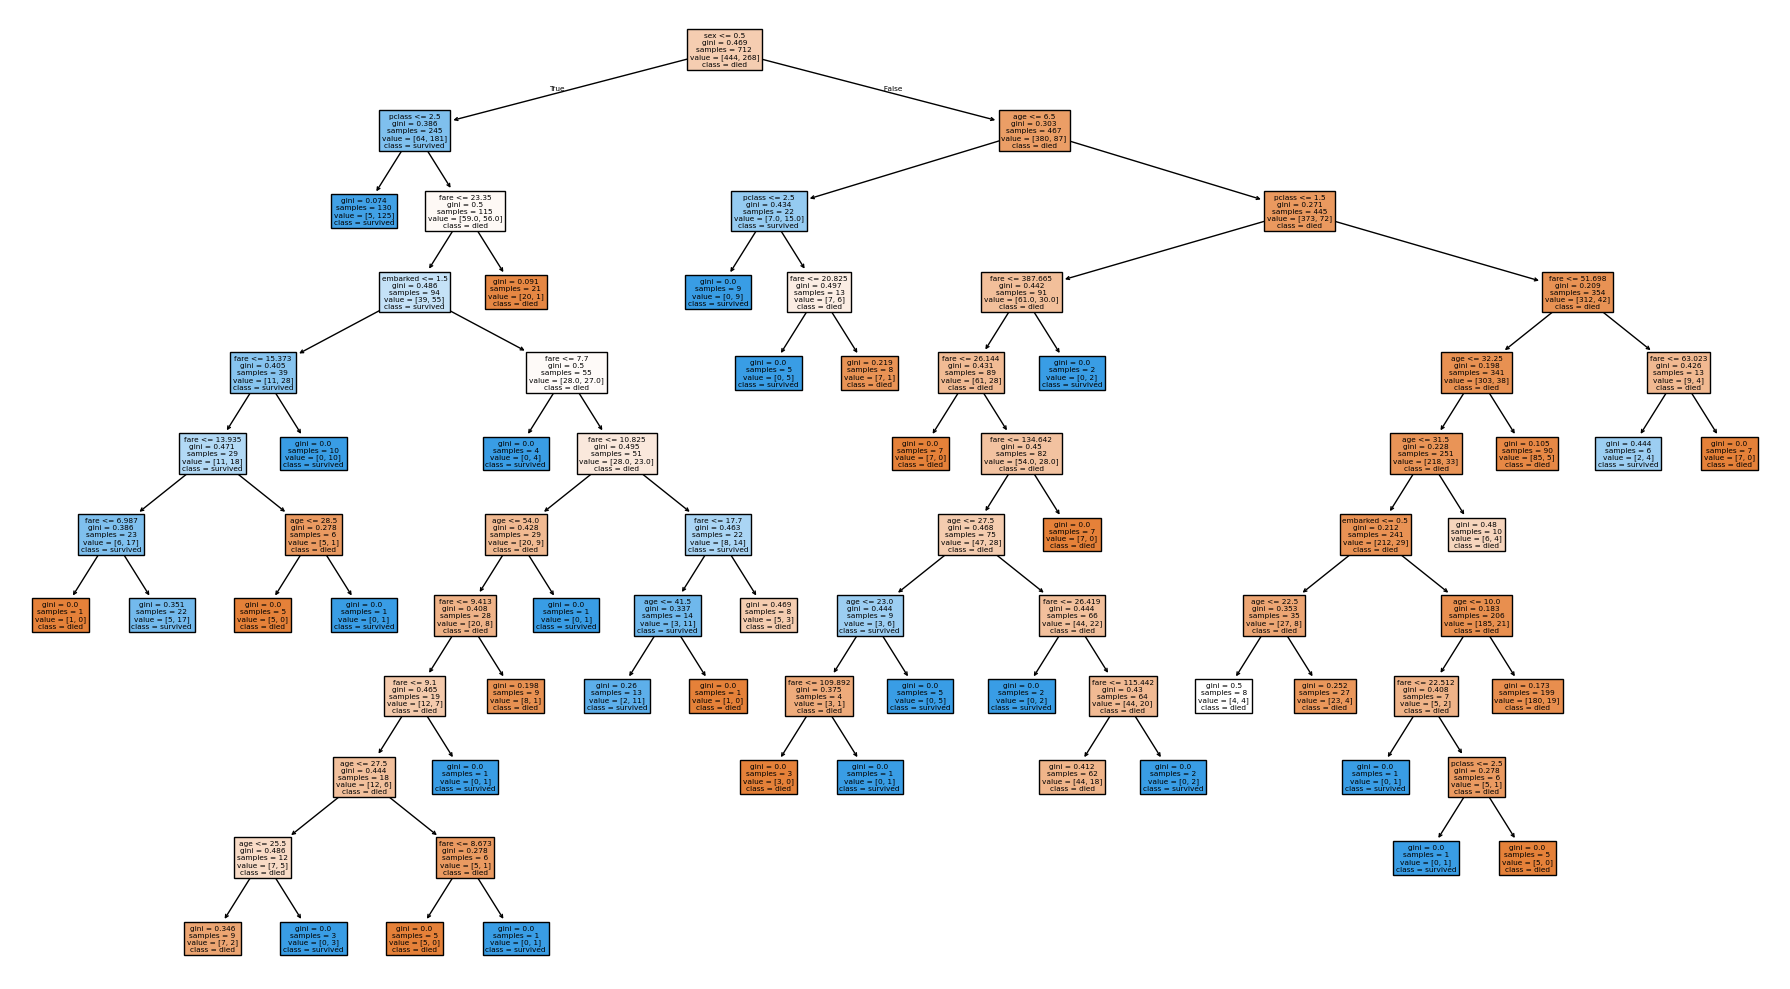

In [42]:
plt.figure(figsize =(18,10))
plot_tree(
    best_model,
    feature_names = X.columns,
    class_names = ["died","survived"],
    filled = True,
)

plt.tight_layout()
plt.show()

In [43]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators = 201,
    oob_score = True,
   
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("OOB Score", rf.oob_score_)
print("testing accuracy", accuracy_score(y_test, y_pred))

OOB Score 0.7991573033707865
testing accuracy 0.8044692737430168
